<a href="https://colab.research.google.com/github/innysik222/Pandas-Numpy-ML-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22practice_NN_keras_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая нейросеть на Keras


## Сегодня на практическом занятии:

1. Обучим нейросеть на Keras для задачи регрессии (california housing)
2. Подготовим изображения к обучению нейросети
3. Обучим нейросеть на Keras для задачи классификации (MNIST)
4. Обучим нейросеть на Keras для задачи восстановления изображений

## Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
# Ваш код здесь

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y, random_state=10,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_norm=mms.fit_transform(X_train)

#### 1.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
from keras.layers import Dense
from keras.models import Sequential
model=Sequential([Dense(16,input_shape=(8,),activation='relu'),
                  Dense(8, activation='relu'),
                  Dense(1, activation='relu')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                144       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
# Ваш код здесь
model.compile(optimizer='sgd',loss='mse', metrics='mae')


#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
model.fit(X_norm,y_train, epochs=20)


Epoch 1/20
516/516 [==============================] - 1s 1ms/step - loss: 0.8539 - mae: 0.6978
Epoch 2/20
516/516 [==============================] - 1s 1ms/step - loss: 0.5668 - mae: 0.5562
Epoch 3/20
516/516 [==============================] - 1s 1ms/step - loss: 0.5413 - mae: 0.5391
Epoch 4/20
516/516 [==============================] - 1s 1ms/step - loss: 0.5236 - mae: 0.5286
Epoch 5/20
516/516 [==============================] - 1s 1ms/step - loss: 0.5139 - mae: 0.5218
Epoch 6/20
516/516 [==============================] - 1s 1ms/step - loss: 0.5049 - mae: 0.5171
Epoch 7/20
516/516 [==============================] - 1s 1ms/step - loss: 0.4994 - mae: 0.5143
Epoch 8/20
516/516 [==============================] - 1s 1ms/step - loss: 0.4946 - mae: 0.5110
Epoch 9/20
516/516 [==============================] - 1s 1ms/step - loss: 0.4900 - mae: 0.5082
Epoch 10/20
516/516 [==============================] - 1s 1ms/step - loss: 0.4890 - mae: 0.5070
Epoch 11/20
516/516 [============================

#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Если модель обучается плохо, можете внести изменения в работу.

In [ ]:
# Ваш вывод здесь


#### 1.6. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
X_test=mms.transform(X_test)
preds_test=model.predict(X_test)
preds_train=model.predict(X_norm)
preds_test



array([[3.1133776],
       [2.4603775],
       [2.133875 ],
       ...,
       [2.2004156],
       [1.0713911],
       [4.1935177]], dtype=float32)

In [ ]:
import pandas as pd
import numpy as np
pd.DataFrame({'true': np.squeeze(y_test),
              'test_predict': np.squeeze(preds_test)
              
    
})

,true,test_predict
0,1.67400,3.113378
1,3.54100,2.460377
2,1.60200,2.133875
3,1.40800,1.559944
4,1.07800,1.668101
...,...,...
4123,1.06300,1.246734
4124,3.93700,3.275783
4125,1.31300,2.200416
4126,0.92300,1.071391


#### 1.7. Посчитайте метрику качества на тестовых данных

Доп информация по метрикам [здесь](https://youtu.be/vh2smjQyhp8)

In [ ]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds_test, y_test)


0.4917692662044158

## 2. Нейросеть для MNIST

Будем работать с набором данных `MNIST` из `keras`.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train[1].shape

(28, 28)

### 2.1. Отрисуйте несколько примеров из обучения

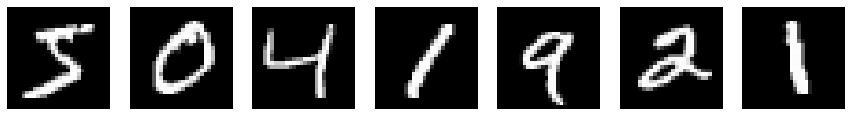

In [ ]:
# Ваш код здесь
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 7, figsize=(15, 10))

for i in range(7):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

### 2.2. Подготовка данных

#### 2.2.1. Возьмите для обучения только два класса (3 и 8), чтобы сделать задачу бинарной классификации.

In [ ]:
# Ваш код здесь
idx=np.where((y_train==3)|(y_train==8))
X_train=X_train[idx]
y_train=y_train[idx]
X_train.shape, y_train.shape

((11982, 28, 28), (11982,))

#### 2.2.2. И тоже самое сделайте для теста

In [ ]:
# Ваш код здесь
idx2=np.where((y_test==3)|(y_test==8))
X_test=X_test[idx2]
y_test=y_test[idx2]
X_test.shape, y_test.shape



((1984, 28, 28), (1984,))

#### 2.2.3. Отрисуйте несколько изображений из новых данных


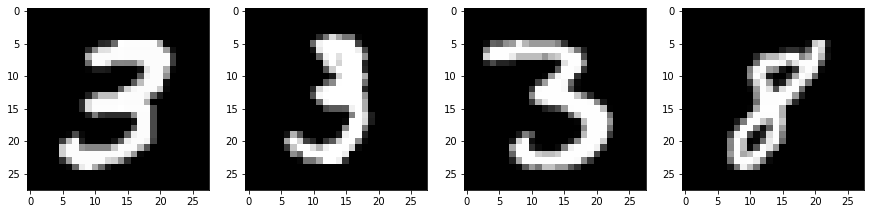

In [ ]:
# Ваш код здесь
fig, ax =plt.subplots(1,4,figsize=(15,10))
for i in range(4):
  ax[i].imshow(X_train[i],cmap='gray')


In [ ]:
y_train[:5]

array([3, 3, 3, 8, 3], dtype=uint8)

#### 2.2.4. Нормируйте данные

In [ ]:
# Ваш код здесь
X_train=X_train/255
X_test=X_test/255


#### 2.2.5. Преобразуйте целевые значения в бинарный вид

При этом еще нужно вначале перевести класс 3 и 8 в 0 и 1, только при таких метках класса сетка будет обучаться правильно.

In [ ]:
y_train[y_train == 3] = 0
y_train[y_train == 8] = 1

y_test[y_test == 3] = 0
y_test[y_test == 8] = 1


y_train

from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train[:5]

array([0, 0, 0, 1, 0], dtype=uint8)

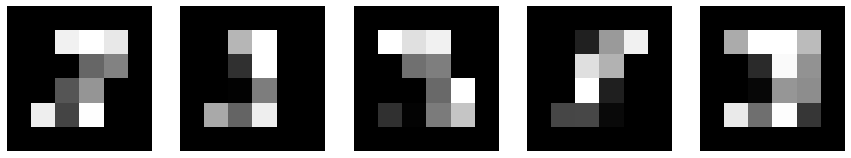

In [ ]:
# Ваш код здесь
import tensorflow as tf
X_train_resized = tf.image.resize(X_train[..., np.newaxis], (6, 6))[..., 0]
X_test_resized = tf.image.resize(X_test[..., np.newaxis], (6, 6))[..., 0]

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train_resized[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### 2.3. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
#X_train_resized[0].numpy().flatten()
from keras.layers import Flatten
tf.random.set_seed(9)

model = Sequential([
    Flatten(input_shape=(6, 6)),
    Dense(2, activation='sigmoid')
])

#model = Sequential([
    #Flatten(input_shape=(28, 28)),
    #Dense(512, activation='relu'),
    #Dense(128, activation='relu'),
    #Dense(2, activation='sigmoid')
#])

model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 36)                0         
                                                                 
 dense_20 (Dense)            (None, 2)                 74        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


### 2.4. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
# Ваш код здесь
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')


### 2.5. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
model.fit(X_train_resized, y_train_cat, epochs=10)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.8414
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4988 - accuracy: 0.8454
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.8481
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4678 - accuracy: 0.8501
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.8508
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8531
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.8545
Epoch 8/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.8551
Epoch 9/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8554
Epoch 10/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8564

### 2.6. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
pred=model.predict(X_test_resized)
pred_cls=pred.argmax(axis=1)
pred_cls


array([0, 0, 0, ..., 0, 1, 0])

### 2.7. Посчитайте метрику качества на тестовых данных

По метрикам можете повторить эти занятия по [ссылке](https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje)

In [ ]:
# Ваш код здесь
from sklearn.metrics import accuracy_score

print(f'test acc: {accuracy_score(y_test, pred_cls)*100:.2f}% ({(y_test == pred_cls).sum()} out of {y_test.shape[0]})')


test acc: 85.79% (1702 out of 1984)


## 3. Нейросеть для восстановления изображения

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор 4096.

### 3.1. Работа с данными

#### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
# Ваш код здесь
train=train.reshape((train.shape[0],64,64))
test=test.reshape((test.shape[0],64,64))
train.shape


(320, 64, 64)

#### 3.1.2. Отрисуйте несколько примеров

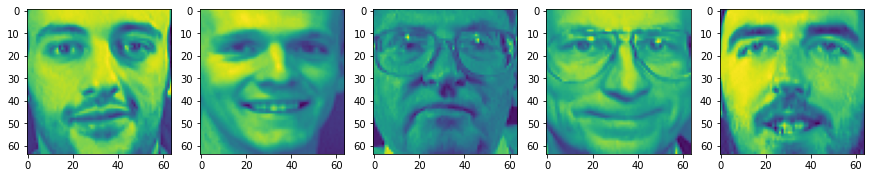

In [ ]:
# Ваш код здесь
fig,ax=plt.subplots(1,5,figsize=(15,10))
for i in range(5):
  ax[i].imshow(train[i])


Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

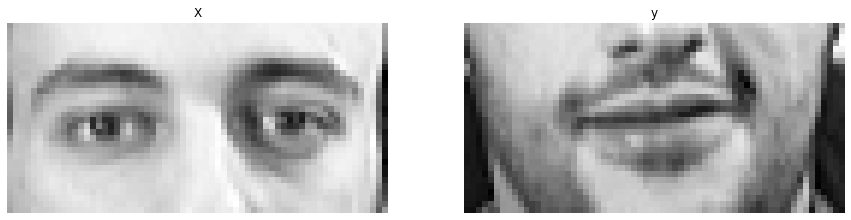

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048. 

In [ ]:
# Ваш код здесь
y_train_n=y_train.reshape(y_train.shape[0],32*64)
y_test_n=y_test.reshape(y_test.shape[0],32*64)
y_train_n.shape


(320, 2048)

### 3.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
model = Sequential([
    Flatten(input_shape=(32, 64)),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(32*64, activation='linear'),
    
])

model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_33 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_34 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_35 (Dense)            (None, 2048)              2099200   
                                                                 
Total params: 5,246,976
Trainable params: 5,246,976
Non-trainable params: 0
_________________________________________________________________


### 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь
model.compile(optimizer='adam', loss='mse', metrics='mae')


### 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
model.fit(X_train,y_train_n, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 79ms/step - loss: 0.0997 - mae: 0.2287
Epoch 2/10
10/10 [==============================] - 1s 83ms/step - loss: 0.0231 - mae: 0.1201
Epoch 3/10
10/10 [==============================] - 1s 64ms/step - loss: 0.0203 - mae: 0.1133
Epoch 4/10
10/10 [==============================] - 1s 51ms/step - loss: 0.0191 - mae: 0.1088
Epoch 5/10
10/10 [==============================] - 1s 55ms/step - loss: 0.0174 - mae: 0.1038
Epoch 6/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0173 - mae: 0.1032
Epoch 7/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0159 - mae: 0.0986
Epoch 8/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0150 - mae: 0.0947
Epoch 9/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0153 - mae: 0.0960
Epoch 10/10
10/10 [==============================] - 1s 55ms/step - loss: 0.0148 - mae: 0.0943


### 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь
preds=model.predict(X_test)


### 3.6. Посчитайте метрику качества на тестовых данных

Доп информация по метрикам [здесь](https://youtu.be/vh2smjQyhp8)

In [ ]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)


0.09394018

### 3.7. Поменяйте размерность предсказанных векторов в двумерное изображение

In [ ]:
# Ваш код здесь
pred_test = preds.reshape(preds.shape[0], 32, 64)
pred_test.shape

(80, 32, 64)

А сейчас отрисуем все предсказания.

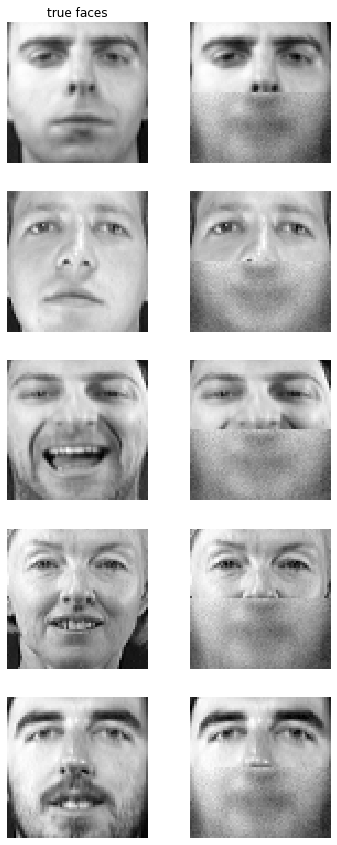

In [ ]:
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )

## Резюме 

Сегодня на практическом занятии:

1. Обучили нейросеть на Keras для задачи регрессии (california housing)
2. Подготовили изображения к обучению нейросети
3. Обучили нейросеть на Keras для задачи классификации (MNIST)
4. Обучили нейросеть на Keras для задачи восстановления изображений

**Муррр** ♥